# Metody Inteligencji Obliczeniowej w Analizie Danych

[Tasks](https://pages.mini.pw.edu.pl/~karwowskij/mioad/lab-sieci.html)

### Lab 4: NN3: Implementacja momentu i normalizacji gradientu (1 tydzień, 2 punkty)

Zaimplementować dwa usprawnienia uczenia gradientowego sieci neuronowej:
- moment,
- normalizację gradientu RMSProp.

Porównać szybkość zbieżności procesu uczenia dla obu wariantów.

Przeprowadzić eksperymenty na zbiorach(w nawiasach wartość MSE, aby otrzymać 2 punkty):
- square-large (MSE: 1),
- steps-large (MSE: 3),
- multimodal-large (MSE: 9).

Literatura:
- Uczenie gradientowe z momentem: rozdział 3.2.2 Computational Intelligence, A. P. Engelbrecht

- Normalizacja gradientu: Wykład 6e: http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf

#### TODO:

- ~~implement learning with moment~~
- ~~implement RMSProp gradient normalization~~


In [43]:
from MultiLayerPerceptron import NeuralNetwork, Layer
import pandas as pd

### Function for visualization of predicted vs original data

In [44]:
import matplotlib.pyplot as plt
def plot_compare_predicted_real(net, x_train,y_train,x_test,y_test):
    xmin = min(x_train+ x_test)[0] *1.1
    xmax = max(x_train+ x_test)[0] *1.1

    fig1, ax = plt.subplots()

    ax.scatter(x_train, y_train, color="green",label="real y")
    ax.scatter(x_train, net.predict(x_train), color="red",label="predicted y")
    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.title("real vs predicted y - train data")
    ax.set_xlim(xmin, xmax)
    plt.show()

    fig1, ax = plt.subplots()
    ax.scatter(x_test, y_test, color="green",label="real y")
    ax.scatter(x_test, net.predict(x_test), color="red",label="predicted y")
    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.title("real vs predicted y - test data")
    plt.show()

## Dataset 1: Square Large

In [45]:
df_train = pd.read_csv('data/regression/square-large-training.csv').set_index("Unnamed: 0")
df_test = pd.read_csv('data/regression/square-large-test.csv').set_index("Unnamed: 0")
print(df_test.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

                   x           y
Unnamed: 0                      
1           1.366456   38.048149
2          -0.390025 -116.309280
3           1.090418  -22.988883
4           1.805831  163.492435
5          -0.938124  -50.793090


#### Model 1

In [46]:
net1 = NeuralNetwork(weights_randomizer="uniform")
net1.add(Layer(neurons_count=1, add_bias=True))
net1.add(Layer(neurons_count=80, activation_fun="sigmoid", add_bias=True))
net1.add(Layer(neurons_count=1, activation_fun="linear", add_bias=False))

In [47]:
net1.train(x_train, y_train,x_test,y_test, epochs=100, learning_rate=0.0001, batch_size=16, \
            with_moment=True, moment_decay=0.994)

Epoch:    1/100,   MSE train:11635.722,   MSE test:12291.856
Epoch:   11/100,   MSE train:   31.158,   MSE test:   67.035
Epoch:   21/100,   MSE train:    2.934,   MSE test:   48.185
Epoch:   31/100,   MSE train:     0.29,   MSE test:   26.357
Epoch:   41/100,   MSE train:    0.176,   MSE test:   23.594
Epoch:   51/100,   MSE train:    0.134,   MSE test:   21.349
Epoch:   61/100,   MSE train:    0.105,   MSE test:    19.71
Epoch:   71/100,   MSE train:    0.088,   MSE test:   18.599
Epoch:   81/100,   MSE train:    0.077,   MSE test:   17.849
Epoch:   91/100,   MSE train:    0.069,   MSE test:    17.34
Epoch:  100/100,   MSE train:    0.064,   MSE test:   17.025


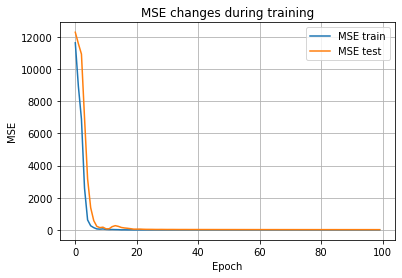

In [48]:
net1.plot_training_history()

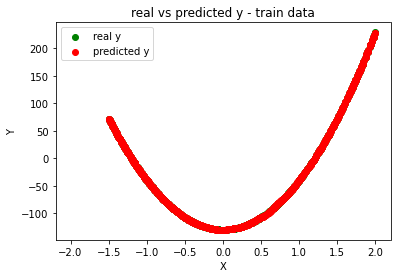

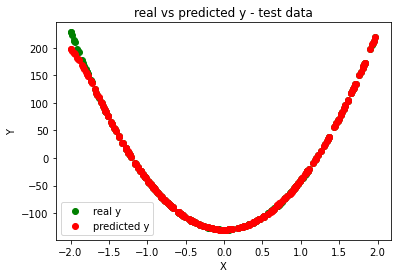

In [49]:
plot_compare_predicted_real(net1, x_train,y_train,x_test,y_test)

#### Model 2

In [86]:
net1 = NeuralNetwork()
net1.add(Layer(neurons_count=1, add_bias=True))
net1.add(Layer(neurons_count=80, activation_fun="sigmoid", add_bias=True))
net1.add(Layer(neurons_count=1, activation_fun="linear", add_bias=False))

In [87]:
net1.train(x_train, y_train,x_test,y_test, epochs=100, learning_rate=0.01, batch_size=32, \
            with_rms_prop=True, rms_prop_decay=0.9999)

Epoch:    1/100,   MSE train:11699.125,   MSE test:12056.284
Epoch:   11/100,   MSE train:   91.121,   MSE test: 1823.595
Epoch:   21/100,   MSE train:   27.826,   MSE test: 1283.363
Epoch:   31/100,   MSE train:   15.538,   MSE test: 1093.105
Epoch:   41/100,   MSE train:      9.9,   MSE test:  997.016
Epoch:   51/100,   MSE train:     6.54,   MSE test:  924.834
Epoch:   61/100,   MSE train:    4.633,   MSE test:  868.239
Epoch:   71/100,   MSE train:    3.501,   MSE test:  824.863
Epoch:   81/100,   MSE train:    2.781,   MSE test:  791.318
Epoch:   91/100,   MSE train:    2.298,   MSE test:  764.653
Epoch:  100/100,   MSE train:    1.986,   MSE test:  744.849


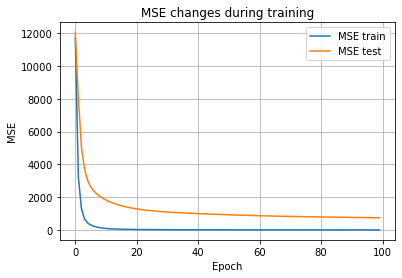

In [88]:
net1.plot_training_history()

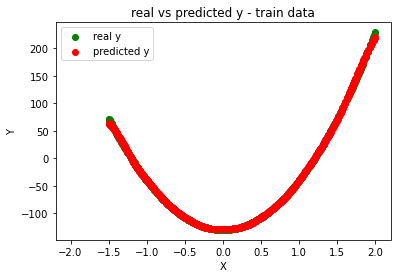

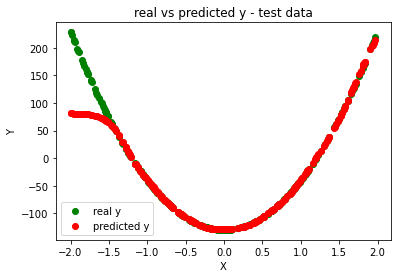

In [89]:
plot_compare_predicted_real(net1, x_train,y_train,x_test,y_test)

## Dataset 2: Steps Large

In [54]:
df_train = pd.read_csv('data/regression/steps-large-training.csv').set_index("Unnamed: 0")
df_test = pd.read_csv('data/regression/steps-large-test.csv').set_index("Unnamed: 0")
print(df_test.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

                   x    y
Unnamed: 0               
1           1.706990  160
2          -0.604580  -80
3          -0.674405  -80
4           1.341562   80
5          -1.427434  -80


#### Model 1

In [57]:
net2 = NeuralNetwork()
net2.add(Layer(neurons_count=1, add_bias=True))
net2.add(Layer(neurons_count=30, activation_fun='tanh', add_bias=True))
net2.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

In [58]:
net2.train(x_train, y_train,x_test,y_test, epochs=120, learning_rate=0.001, batch_size=2, \
            with_moment=True, moment_decay=0.5)

Epoch:    1/120,   MSE train: 6501.981,   MSE test: 6565.995
Epoch:   13/120,   MSE train:   53.151,   MSE test:   46.865
Epoch:   25/120,   MSE train:   42.747,   MSE test:   35.833
Epoch:   37/120,   MSE train:   37.016,   MSE test:   29.908
Epoch:   49/120,   MSE train:   33.425,   MSE test:   26.061
Epoch:   61/120,   MSE train:   30.963,   MSE test:   23.368
Epoch:   73/120,   MSE train:   29.141,   MSE test:   21.344
Epoch:   85/120,   MSE train:   27.708,   MSE test:   19.755
Epoch:   97/120,   MSE train:   26.516,   MSE test:   18.465
Epoch:  109/120,   MSE train:    25.48,   MSE test:   17.388
Epoch:  120/120,   MSE train:   24.625,   MSE test:   16.543


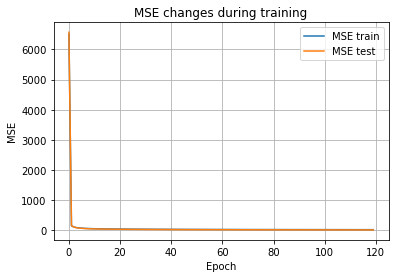

In [59]:
net2.plot_training_history()

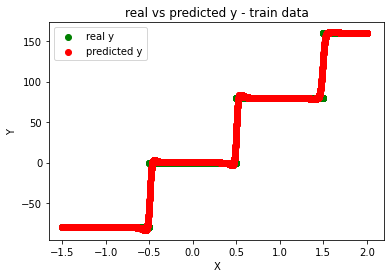

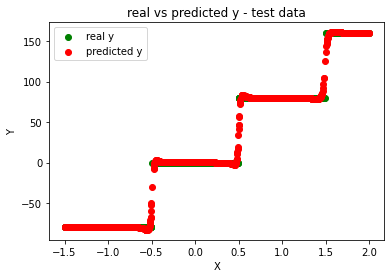

In [60]:
plot_compare_predicted_real(net2, x_train,y_train,x_test,y_test)

### Model 2

In [63]:
net2 = NeuralNetwork()
net2.add(Layer(neurons_count=1, add_bias=True))
net2.add(Layer(neurons_count=30, activation_fun='tanh', add_bias=True))
net2.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

In [64]:
net2.train(x_train, y_train,x_test,y_test, epochs=40, learning_rate=0.001, batch_size=2, \
            with_rms_prop=True, rms_prop_decay=0.8)

Epoch:    1/40,   MSE train: 6612.342,   MSE test:  6676.55
Epoch:    5/40,   MSE train:  548.797,   MSE test:  560.721
Epoch:    9/40,   MSE train:  494.597,   MSE test:  503.242
Epoch:   13/40,   MSE train:   479.03,   MSE test:  486.806
Epoch:   17/40,   MSE train:  469.802,   MSE test:  477.271
Epoch:   21/40,   MSE train:  463.063,   MSE test:  470.422
Epoch:   25/40,   MSE train:  457.402,   MSE test:  464.766
Epoch:   29/40,   MSE train:  452.433,   MSE test:  459.859
Epoch:   33/40,   MSE train:  448.673,   MSE test:  456.181
Epoch:   37/40,   MSE train:  446.105,   MSE test:  453.721
Epoch:   40/40,   MSE train:  444.673,   MSE test:  452.383


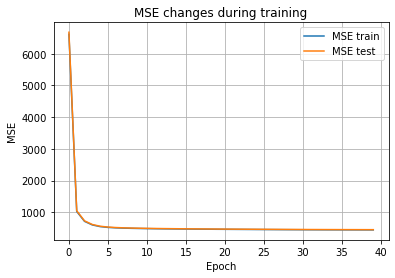

In [65]:
net2.plot_training_history()

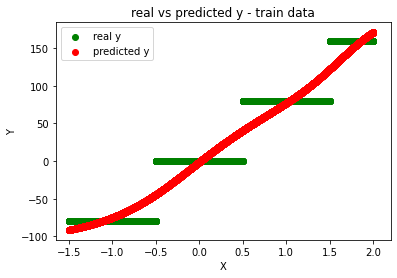

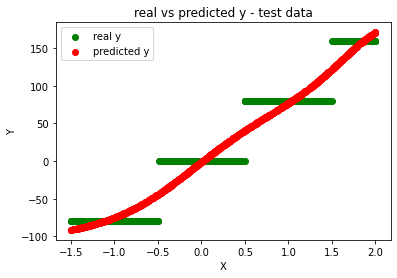

In [66]:
plot_compare_predicted_real(net2, x_train,y_train,x_test,y_test)

## Dataset 3: Multimodal Large

In [67]:
df_train = pd.read_csv('data/regression/multimodal-large-test.csv')
df_test = pd.read_csv('data/regression/multimodal-large-training.csv')
print(df_train.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

          x           y
0  0.493292  -98.208166
1 -0.470203  -55.283891
2  1.869983  100.299997
3 -1.040446    2.720629
4 -0.616507  -75.991636


### Model 1

In [68]:
net3 = NeuralNetwork()
net3.add(Layer(neurons_count=1, add_bias=True))
net3.add(Layer(neurons_count=50, activation_fun='sigmoid', add_bias=True))
net3.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

In [69]:
net3.train(x_train, y_train,x_test,y_test, epochs=150, learning_rate=0.001, batch_size=1, \
            with_moment=True, moment_decay=0.4)

Epoch:    1/150,   MSE train: 5128.393,   MSE test: 5086.457
Epoch:   16/150,   MSE train:  811.614,   MSE test:   754.81
Epoch:   31/150,   MSE train:  227.956,   MSE test:  216.803
Epoch:   46/150,   MSE train:  119.465,   MSE test:  117.711
Epoch:   61/150,   MSE train:   66.175,   MSE test:   67.908
Epoch:   76/150,   MSE train:    36.83,   MSE test:   40.496
Epoch:   91/150,   MSE train:   23.337,   MSE test:   27.929
Epoch:  106/150,   MSE train:   16.099,   MSE test:   21.083
Epoch:  121/150,   MSE train:    12.15,   MSE test:   17.418
Epoch:  136/150,   MSE train:    9.867,   MSE test:   15.281
Epoch:  150/150,   MSE train:      8.5,   MSE test:   13.979


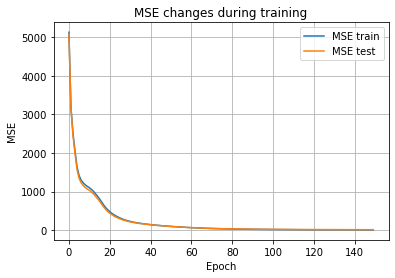

In [73]:
net3.plot_training_history()

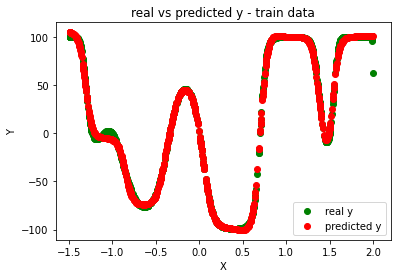

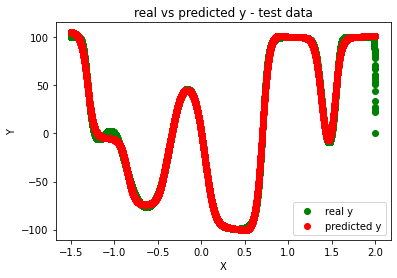

In [74]:
plot_compare_predicted_real(net3, x_train,y_train,x_test,y_test)

### Model 2

In [75]:
net3 = NeuralNetwork()
net3.add(Layer(neurons_count=1, add_bias=True))
net3.add(Layer(neurons_count=50, activation_fun='sigmoid', add_bias=True))
net3.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

In [76]:
net3.train(x_train, y_train,x_test,y_test, epochs=100, learning_rate=0.1, batch_size=1, \
            with_rms_prop=True, rms_prop_decay=0.9)

Epoch:    1/100,   MSE train: 5104.493,   MSE test:   5064.4
Epoch:   11/100,   MSE train: 1112.432,   MSE test: 1050.813
Epoch:   21/100,   MSE train:  1005.12,   MSE test:  944.432
Epoch:   31/100,   MSE train:  920.687,   MSE test:  867.749
Epoch:   41/100,   MSE train:  776.473,   MSE test:  751.793
Epoch:   51/100,   MSE train:  730.749,   MSE test:   710.67
Epoch:   61/100,   MSE train:  710.782,   MSE test:  700.247
Epoch:   71/100,   MSE train:  699.414,   MSE test:  689.941
Epoch:   81/100,   MSE train:  697.087,   MSE test:  687.902
Epoch:   91/100,   MSE train:  688.999,   MSE test:   681.54
Epoch:  100/100,   MSE train:  670.343,   MSE test:  660.119


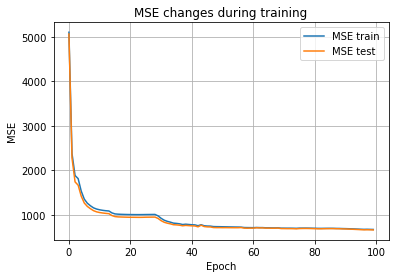

In [77]:
net3.plot_training_history()

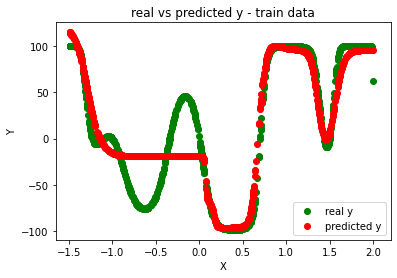

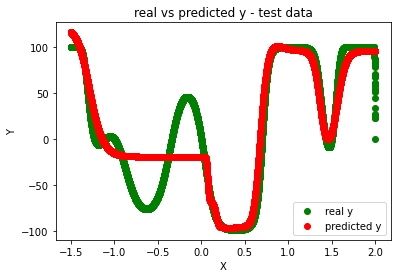

In [78]:
plot_compare_predicted_real(net3, x_train,y_train,x_test,y_test)

# Summary

#### Results

MSE for the `square large` dataset is:  (with moment)
- train:    0.064
- test:     17.025

MSE for the `steps large` dataset is:  (with moment)
- train: 24.625
- test: 16.543

MSE for the `multimodal large` dataset is: (with moment)
- train:    8.5
- test:     13.979

#### Learning speed vs moment or rms_prop

In general, I have observed that `moment` is better than `rms_prop` for the every dataset tested here, meaning it converges faster.